# RNN - Recurrent Neural Network

<img src = 'https://ai4sme.aisingapore.org/wp-content/uploads/2022/06/animated1.gif' width = 700><br> RNN</img>

RNN stands for Recurrent Neural Network, which is a type of artificial neural network that processes sequential data. RNNs are used in a variety of applications, such as speech recognition and sentiment analysis. 

## Why ANN can't be used in sequential data?
Artificial Neural Networks (ANNs) struggle with sequential data due to inherent structural limitations. Here's a breakdown of the key reasons:


##### **Reason 1. Fixed Input/Output Size Requirement**
In real life, sequential data (text, time series, sensor readings) often has variable lengths. For example:
 e.g., 
    <table>
    <tr>
    <th> Sequence</th> <th>Size</th></tr>
    <tr>
    <td> Python is a OOPS programming language </td> <td> 6 </td> </tr>
    <tr><td> I Love India </td><td>3</td></tr>
    <tr><td> I am playing football </td><td>4</td></tr>
    </table>


* Suppose you make an ANN having the below structure.
* It has 3 input nodes.


   <img src = 'https://lh3.googleusercontent.com/d/13sdaMqTjeJvpar38DRKHi_FPU8gDxZIB' width=500>


* Our first sentence contains 6 words, hence the weight metrics will be 6 * 5 structure.
* The second sentence contains 3 words hence the weight metrics will be 3 * 5 structure.
* The third sentence contains 4 words hence the weight metrics will be 4 * 5 structure.

We can see here the structure of the input weight metrics is changing based on the input text, which is not practical for designing.


##### **Reason 2. Zero Padding Unnecessary Computation**

* To solve the first issue of varying length we can use the zero padding technique.
* First, we can count the sentence having maximum words.
* In our case we have the first sentence having a maximum of 6 number of words.
* So we will fix our input text size to a maximum of 6 words.
* In the second sentence, we have a number of words, as we have fixed our input to  6 words, but we have 3 words in 2nd sentence hence we will append 3 more vectors having zero values inside it.
* Hence it is called **zero padding**.

    <img src='https://lh3.googleusercontent.com/d/1MWF7loDs7ICUG4LEXeUCvPlbpuHqr5Ry'></img>


* The problem with zero padding is that if we have the maximum word of a sentence is 1000 words.
* Then we will fix the input length to 1000 nodes.
* But if we got a sentence having only 5 words then for the rest of the 995 words we have to use zero padding.

Which will take extra memory and computation power, decrease the training speed of the model and  undesirable. 



##### **Reason 3. Prediction Problem On Different Input Length**

* In our case, we have set our input length to 6 words while training the model.
* But while predicting suppose we got an input text having the length of 10 words, at that time our model will fail.
* Because we have trained our model with a fixed input size of 6 words, it will not be able to predict for 10 words.




##### **Reason 4. Not Considering Sequential Information**

* ANN architecture does not take into account the sequence information of the input text.
* When we pass the input text to the ANN model it will take all the input at a time.
* When we enter vales at a time it will be mixed up inside the network, hence the sequence information is discarded.
* The sequence information is discarded in the ANN model.
* Hence it is not suitable for the sequential data.


##### **Reason 5. Lack of temporal memory**

ANNs process inputs independently, with no mechanism to retain information from previous steps. This makes them unsuitable for tasks requiring context, such as:

- Language: The word “lie” means different things in “never tell a lie” vs. “lie down”.

- Time series: Predicting stock prices requires historical trends, not just isolated data points.

Example: In the sentence “The cat chased the…”, ANNs cannot retain the context of “cat” to predict “mouse” as the next word.


## RNN Forward Propagation - Step by Step

In forward propagation of an RNN (Recurrent Neural Network), the network processes input sequences step by step. At each time step $t$, it takes the current input $x_t$ and the hidden state from the previous step $h_{t−1}$, applies weights and activation functions (like tanh), and computes the new hidden state $h_t$. This hidden state is then used to predict the output $y_t$. 

The process repeats for each time step, allowing the RNN to capture temporal dependencies in sequential data.

<img src='https://miro.medium.com/v2/resize:fit:1100/format:webp/1*1w2z832C_B6xDovwm7ypJg.jpeg'></img>


### **1. Problem Setup**
We have a dataset of sentences:

| Sequence | Size |
|----------|------|
| "Show is nice" | 3 |
| "Show is not nice" | 4 |
| "Show is worst" | 3 |

Each word is represented using **One-Hot Encoding (OHE)**.
### **2. Network Architecture**
- **Input Layer:** 5 neurons (each representing a one-hot encoded word)
- **Hidden Layer:** 3 neurons (processing sequential information)
- **Output Layer:** 1 neuron (final prediction using softmax activation)



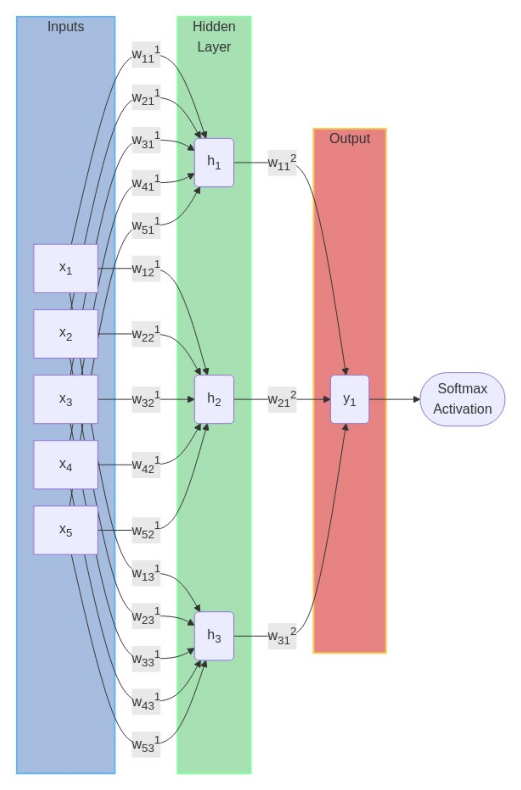

In [41]:
#| code-fold: true
import base64
import io, requests
from IPython.display import Image, display
from PIL import Image as im
import matplotlib.pyplot as plt

def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    img = im.open(io.BytesIO(requests.get('https://mermaid.ink/img/' + base64_string).content))
    plt.figure(figsize=(15,10))
    plt.axis('off') # allow to hide axis
    plt.imshow(img)

mm("""
%%{init: {"flowchart": {"nodeSpacing": 20, "rankSpacing": 40, 'height':1}}}%%
graph LR
    subgraph Inputs
        direction LR
        style Inputs fill:#a7bde0,stroke:#64b5f6,font-size:30,stroke-width:2px
        x1[x<sub>1</sub>]
        x2[x<sub>2</sub>]
        x3[x<sub>3</sub>]
        x4[x<sub>4</sub>]
        x5[x<sub>5</sub>]
    end
    
    subgraph "hidden-layer" ["Hidden \nLayer"]
        direction LR
        style hidden-layer fill:#a7e0b3,stroke:#85ff9f,font-size:30,stroke-width:2px
        h1(h<sub>1</sub>)
        h2(h<sub>2</sub>)
        h3(h<sub>3</sub>)
    end
    
    subgraph Output
        direction LR
        style Output fill:#e78383,stroke:#f8cc52,font-size:30,stroke-width:2px
        y(y<sub>1</sub>)
    end

    x1 --> |w<sub>11</sub><sup>1</sup>| h1
    x1 --> |w<sub>12</sub><sup>1</sup>| h2
    x1 --> |w<sub>13</sub><sup>1</sup>| h3
    x2 --> |w<sub>21</sub><sup>1</sup>| h1
    x2 --> |w<sub>22</sub><sup>1</sup>| h2
    x2 --> |w<sub>23</sub><sup>1</sup>| h3
    x3 --> |w<sub>31</sub><sup>1</sup>| h1
    x3 --> |w<sub>32</sub><sup>1</sup>| h2
    x3 --> |w<sub>33</sub><sup>1</sup>| h3
    x4 --> |w<sub>41</sub><sup>1</sup>| h1
    x4 --> |w<sub>42</sub><sup>1</sup>| h2
    x4 --> |w<sub>43</sub><sup>1</sup>| h3
    x5 --> |w<sub>51</sub><sup>1</sup>| h1
    x5 --> |w<sub>52</sub><sup>1</sup>| h2
    x5 --> |w<sub>53</sub><sup>1</sup>| h3

    h1 --> |w<sub>11</sub><sup>2</sup>| y
    h2 --> |w<sub>21</sub><sup>2</sup>| y
    h3 --> |w<sub>31</sub><sup>2</sup>| y

    y --> Out(["Softmax \nActivation"])
""")

### **3. One-Hot Encoding Representation**
Since we have five unique words {"Show", "is", "nice", "worst", "not"}, each word is a 5-dimensional vector:

| Word  | One-Hot Encoding |
|--------|-----------------|
| Show  | `[1, 0, 0, 0, 0]` |
| is    | `[0, 1, 0, 0, 0]` |
| nice   | `[0, 0, 1, 0, 0]` |
| worst    | `[0, 0, 0, 1, 0]` |
| not    | `[0, 0, 0, 0, 1]` |

Each word is now represented as a **5-dimensional vector**.

### **4. Defining RNN Parameters**
- **Weight matrices:**
  - Input-to-Hidden weights **(W_x):** `3 × 5` matrix
  - Hidden-to-Hidden weights **(W_h):** `3 × 3` matrix
  - Bias **(b):** `3 × 1` vector
  - Hidden-to-Output weights **(W_y):** `1 × 3` matrix
  - Output bias **(b_y):** `1 × 1` scalar
  
#### **Weight Matrices**
$$
W_x = \begin{bmatrix} 0.1 & 0.2 & 0.3 & 0.4 & 0.5 \\ 0.6 & 0.7 & 0.8 & 0.9 & 1.0 \\ 1.1 & 1.2 & 1.3 & 1.4 & 1.5 \end{bmatrix}
$$
$$
W_h = \begin{bmatrix} 0.9 & 0.8 & 0.7 \\ 0.6 & 0.5 & 0.4 \\ 0.3 & 0.2 & 0.1 \end{bmatrix}
$$
$$
b = \begin{bmatrix} 0.1 \\ 0.1 \\ 0.1 \end{bmatrix}
$$
$$
W_y = \begin{bmatrix} 0.5 & 0.6 & 0.7 \end{bmatrix}
$$
$$
b_y = \begin{bmatrix} 0.2 \end{bmatrix}
$$

### **5. Forward Propagation Formula**
For each time step `t`:

$$
h_t = \tanh(W_x x_t + W_h h_{t-1} + b)
$$
$$
y_t = \text{softmax}(W_y h_t + b_y)
$$
where:
- $x_t$ = Input word (one-hot encoded vector of shape `5 × 1`)
- $h_t$ = Hidden state (`3 × 1`)
- $y_t$ = Output (`1 × 1` scalar)

### **6. Forward Propagation Calculation**
#### **Step 1: Processing First Word "Show" (t = 1)**
$$
x_1 = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}
$$

Detailed calculation of $(W_x  x_1)$:
$$
W_x x_1 = \begin{bmatrix} 0.1 & 0.2 & 0.3 & 0.4 & 0.5 \\ 0.6 & 0.7 & 0.8 & 0.9 & 1.0 \\ 1.1 & 1.2 & 1.3 & 1.4 & 1.5 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}
$$
$$
= \begin{bmatrix} (0.1 \times 1) + (0.2 \times 0) + (0.3 \times 0) + (0.4 \times 0) + (0.5 \times 0) \\ (0.6 \times 1) + (0.7 \times 0) + (0.8 \times 0) + (0.9 \times 0) + (1.0 \times 0) \\ (1.1 \times 1) + (1.2 \times 0) + (1.3 \times 0) + (1.4 \times 0) + (1.5 \times 0) \end{bmatrix}
$$
$$
= \begin{bmatrix} 0.1 \\ 0.6 \\ 1.1 \end{bmatrix}
$$

Since $h_0$ is initialized to zeros:
$$
W_h h_0 = \begin{bmatrix} 0.9 & 0.8 & 0.7 \\ 0.6 & 0.5 & 0.4 \\ 0.3 & 0.2 & 0.1 \end{bmatrix} \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}
$$

Now we calculate $z_1$:
$$
z_1 = W_x x_1 + W_h h_0 + b = \begin{bmatrix} 0.1 \\ 0.6 \\ 1.1 \end{bmatrix} + \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \\ 0.1 \end{bmatrix} = \begin{bmatrix} 0.2 \\ 0.7 \\ 1.2 \end{bmatrix}
$$

Apply tanh activation function:
$$
h_1 = \tanh(z_1) = \begin{bmatrix} \tanh(0.2) \\ \tanh(0.7) \\ \tanh(1.2) \end{bmatrix} \approx \begin{bmatrix} 0.198 \\ 0.604 \\ 0.833 \end{bmatrix}
$$

#### **Step 2: Processing Second Word "is" (t = 2)**
$$
x_2 = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}
$$

Detailed calculation of $W_x  x_2$:
$$
W_x  x_2 = \begin{bmatrix} 0.1 & 0.2 & 0.3 & 0.4 & 0.5 \\ 0.6 & 0.7 & 0.8 & 0.9 & 1.0 \\ 1.1 & 1.2 & 1.3 & 1.4 & 1.5 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}
$$
$$
= \begin{bmatrix} (0.1 \times 0) + (0.2 \times 1) + (0.3 \times 0) + (0.4 \times 0) + (0.5 \times 0) \\ (0.6 \times 0) + (0.7 \times 1) + (0.8 \times 0) + (0.9 \times 0) + (1.0 \times 0) \\ (1.1 \times 0) + (1.2 \times 1) + (1.3 \times 0) + (1.4 \times 0) + (1.5 \times 0) \end{bmatrix}
$$
$$
= \begin{bmatrix} 0.2 \\ 0.7 \\ 1.2 \end{bmatrix}
$$

Detailed calculation of $W_h  h_1$:
$$
W_h h_1 = \begin{bmatrix} 0.9 & 0.8 & 0.7 \\ 0.6 & 0.5 & 0.4 \\ 0.3 & 0.2 & 0.1 \end{bmatrix} \begin{bmatrix} 0.198 \\ 0.604 \\ 0.833 \end{bmatrix}
$$
$$
= \begin{bmatrix} (0.9 \times 0.198) + (0.8 \times 0.604) + (0.7 \times 0.833) \\ (0.6 \times 0.198) + (0.5 \times 0.604) + (0.4 \times 0.833) \\ (0.3 \times 0.198) + (0.2 \times 0.604) + (0.1 \times 0.833) \end{bmatrix}
$$
$$
= \begin{bmatrix} 0.178 + 0.483 + 0.583 \\ 0.119 + 0.302 + 0.333 \\ 0.059 + 0.121 + 0.083 \end{bmatrix} = \begin{bmatrix} 1.244 \\ 0.754 \\ 0.263 \end{bmatrix}
$$

Now we calculate $z_2$:
$$
z_2 = W_x x_2 + W_h h_1 + b = \begin{bmatrix} 0.2 \\ 0.7 \\ 1.2 \end{bmatrix} + \begin{bmatrix} 1.244 \\ 0.754 \\ 0.263 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \\ 0.1 \end{bmatrix} = \begin{bmatrix} 1.544 \\ 1.554 \\ 1.563 \end{bmatrix}
$$

Apply tanh activation function:
$$
h_2 = \tanh(z_2) = \begin{bmatrix} \tanh(1.544) \\ \tanh(1.554) \\ \tanh(1.563) \end{bmatrix} \approx \begin{bmatrix} 0.911 \\ 0.914 \\ 0.917 \end{bmatrix}
$$

#### **Step 3: Output Calculation**
Detailed calculation of $W_y  h_2$:
$$
W_y h_2 = \begin{bmatrix} 0.5 & 0.6 & 0.7 \end{bmatrix} \begin{bmatrix} 0.911 \\ 0.914 \\ 0.917 \end{bmatrix}
$$
$$
= (0.5 \times 0.911) + (0.6 \times 0.914) + (0.7 \times 0.917)
$$
$$
= 0.456 + 0.548 + 0.642 = 1.646
$$

Adding the output bias:
$$
W_y h_2 + b_y = 1.646 + 0.2 = 1.846
$$

Apply softmax/sigmoid activation:
$$
y_{\text{final}} = \frac{1}{1 + e^{-1.846}} \approx 0.864
$$

### **7. Summary**
1. The **initial hidden state** is `[0, 0, 0]`.
2. We processed each word step-by-step using **one-hot encoded input**.
3. At each step, we computed:
   - $W_x x_t$ (extracting the correct column for the word)
   - $W_h h_{t-1}$ (previous hidden state transformation)
   - Added bias and applied **tanh activation**.
4. The final hidden state is passed through **softmax activation** to get the final **output prediction**.
This model can be used for **classification**, **sentiment analysis**, or **next-word prediction**.


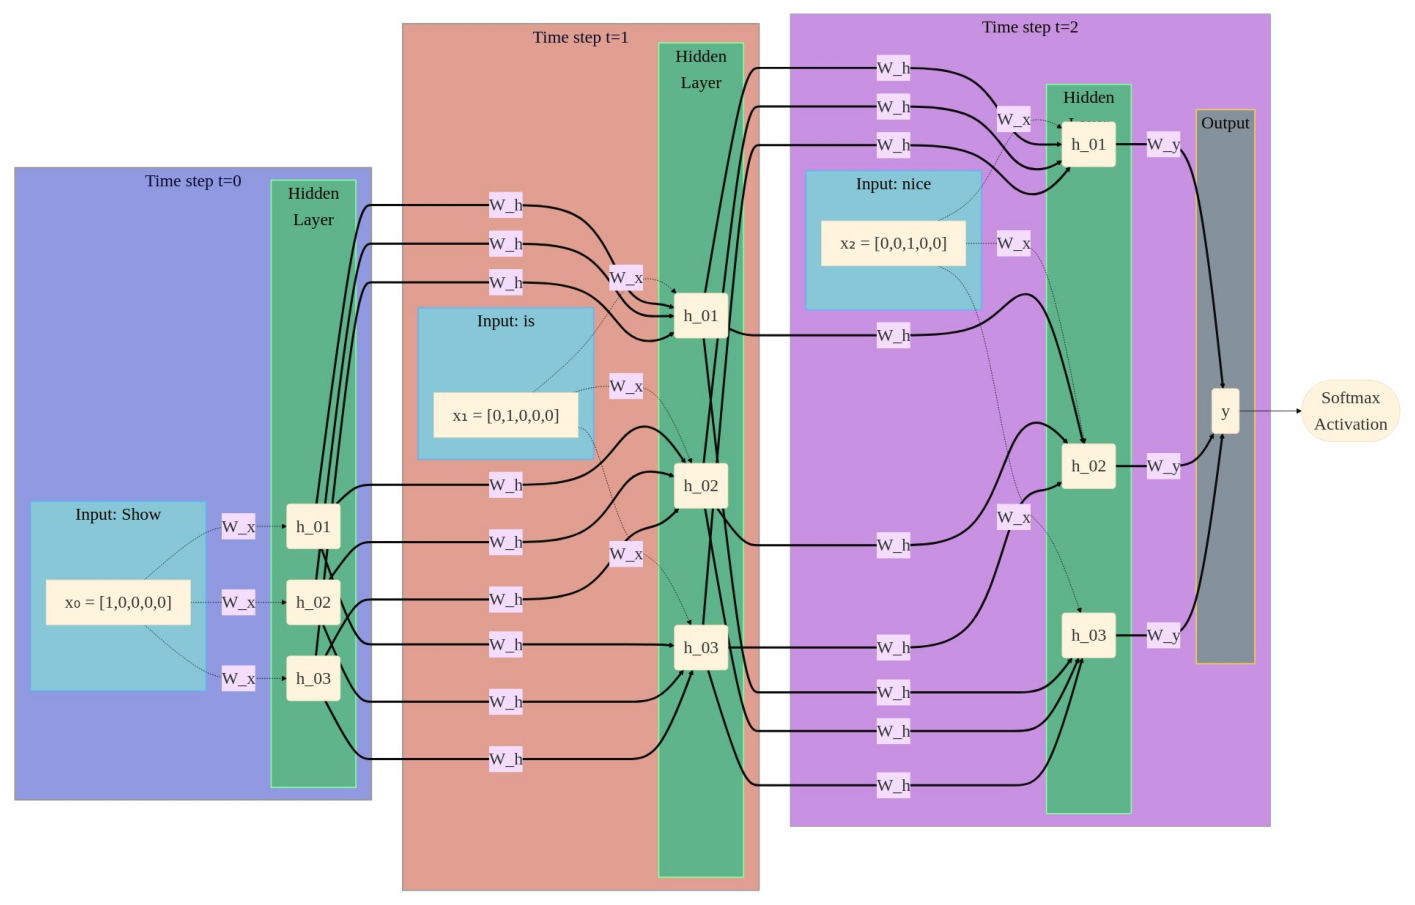

In [65]:
#| fig-width: 100
#| fig-align: center
import base64
import io, requests
from IPython.display import Image, display
from PIL import Image as im
import matplotlib.pyplot as plt

def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    img = im.open(io.BytesIO(requests.get('https://mermaid.ink/img/' + base64_string).content))
    plt.figure(figsize=(18,18))
    plt.axis('off') # allow to hide axis
    plt.imshow(img)

mm("""
%%{init: {'theme': 'base', 'themeVariables': { 'fontSize': '28px', 'fontFamily': 'Inter'}}}%%
graph LR
    subgraph "t_0" ["Time step t=0"]
        direction TB
        style t_0 fill:#9199e1,stroke:#999988,stroke-width:2px,font-size:30,color:#080b2c
        
        subgraph inputs0 ["Input: Show"]
            direction LR
            style inputs0 fill:#87c7d8,stroke:#64b5f6,stroke-width:2px
            x0["x₀ = [1,0,0,0,0]"]
        end
        
        subgraph hidden0 ["Hidden \nLayer"]
            direction LR
            style hidden0 fill:#5fb48b,stroke:#85ff9f,stroke-width:2px
            h0_1(h_01)
            h0_2(h_02)
            h0_3(h_03)
        end
    end
    
    subgraph "t_1" ["Time step t=1"]
        direction TB
        style t_1 fill:#e19f91,stroke:#999999,stroke-width:2px,font-size:30,color:#080b2c
        
        subgraph inputs1 ["Input: is"]
            direction LR
            style inputs1 fill:#87c7d8,stroke:#64b5f6,stroke-width:2px
            x1["x₁ = [0,1,0,0,0]"]
        end
        
        subgraph hidden1 ["Hidden \nLayer"]
            direction LR
            style hidden1 fill:#5fb48b,stroke:#85ff9f,stroke-width:2px
            h1_1(h_01)
            h1_2(h_02)
            h1_3(h_03)
        end
    end
    
    subgraph "t_2" ["Time step t=2"]
        direction TB
        style t_2 fill:#c891e1,stroke:#999999
        
        subgraph inputs2 ["Input: nice"]
            direction LR
            style inputs2 fill:#87c7d8,stroke:#64b5f6,stroke-width:2px
            x2["x₂ = [0,0,1,0,0]"]
        end
        
        subgraph hidden2 ["Hidden \n Layer"]
            direction LR
            style hidden2 fill:#5fb48b,stroke:#85ff9f,stroke-width:2px
            h2_1(h_01)
            h2_2(h_02)
            h2_3(h_03)
        end
        
        subgraph output ["Output"]
            direction LR
            style output fill:#85929e,stroke:#f8cc52,stroke-width:2px
            y_final(y)
        end
    end
    
    %% Input to hidden connections with Wx
    x0 -.->|W_x| h0_1
    x0 -.->|W_x| h0_2
    x0 -.->|W_x| h0_3
    
    x1 -.->|W_x| h1_1
    x1 -.->|W_x| h1_2
    x1 -.->|W_x| h1_3
    
    x2 -.->|W_x| h2_1
    x2 -.->|W_x| h2_2
    x2 -.->|W_x| h2_3
    
    %% Recurrent connections with Wh (Red)
    h0_1 ===>|W_h| h1_1
    h0_2 ===>|W_h| h1_1
    h0_3 ===>|W_h| h1_1
    
    h0_1 ===>|W_h| h1_2
    h0_2 ===>|W_h| h1_2
    h0_3 ===>|W_h| h1_2
    
    h0_1 ===>|W_h| h1_3
    h0_2 ===>|W_h| h1_3
    h0_3 ===>|W_h| h1_3
    
    h1_1 ===>|W_h| h2_1
    h1_2 ===>|W_h| h2_1
    h1_3 ===>|W_h| h2_1
    
    h1_1 ===>|W_h| h2_2
    h1_2 ===>|W_h| h2_2
    h1_3 ===>|W_h| h2_2
    
    h1_1 ===>|W_h| h2_3
    h1_2 ===>|W_h| h2_3
    h1_3 ===>|W_h| h2_3
    
    %% Hidden to output connections (Red)
    h2_1 ==> |W_y| y_final
    h2_2 ==> |W_y| y_final
    h2_3 ==> |W_y| y_final
    
    y_final --> Out(["Softmax\nActivation"])
    
    %% Bias connections are implied
""")